## corv: Validations Off Of Falcon et al 2010

[GitHub Page](https://github.com/vedantchandra/corv)

---

Table Of Contents:

1. [Validation Without Templates](#validation-no-template)
2. [Validation With Templates](#db-no-template)

---

<a id="validation-no-template"></a>

**01. Validating RVs Without Templates (Need to check/proofread)**

---



In [1]:
### General
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.table import Table, Column, MaskedColumn, join

from astroquery.sdss import SDSS

from tqdm import tqdm

import corv
#corv.sdss.make_catalogs()

/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [2]:
catalog = Table.read('data/sed_radii.fits')
falcon = Table.read('data/falcon2010.fit')

catalog['corv_rv'] = -9999 * np.ones(len(catalog))
catalog['corv_erv'] = -9999 * np.ones(len(catalog))

In [3]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table, join_skycoord
from astropy import table

catalog['wd_pos'] = SkyCoord(catalog['ra'], catalog['dec'], unit='deg')
falcon['wd_pos'] = SkyCoord(falcon['_RA'], falcon['_DE'], unit='deg')

join_func = table.join_skycoord(5 * u.arcsecond)
falcon_xmatch = table.join(catalog, falcon, join_funcs={'wd_pos': join_skycoord(5 * u.arcsec)})

In [4]:
figs = []

for j in tqdm( range(len(falcon_xmatch))):
    p,m,f = np.array(falcon_xmatch['col_p_m_f'][j].split('-')).astype(float)
    
    try:
        xid = SDSS.query_specobj(plate = p, mjd = m, fiberID = f)
    except ValueError:
        print('unknown error')
        
    try:
        sp = SDSS.get_spectra(matches=xid)
    except:
        print('http error')
        continue
    for i in range(len(sp[0:1])):
        wl = np.array(10**sp[i][1].data['loglam'])
        fl = np.array(sp[i][1].data['flux'])
        ivar = np.array(sp[i][1].data['ivar'])
                
        corvmodel = corv.models.make_balmer_model(names = ['a','b','g','d'])
        param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)        
        
        
    falcon_xmatch['corv_rv'][j] = (rv_res.params['RV'].value)
    falcon_xmatch['corv_erv'][j] = (rv_res.params['RV'].stderr)

  0%|                                                                                            | 0/97 [00:00<?, ?it/s]/home/arseneau/anaconda3/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
100%|███████████████████████████████████████████████████████████████████████████████████| 97/97 [03:53<00:00,  2.40s/it]


In [5]:
rms = (falcon_xmatch['Adp-V'][np.abs(falcon_xmatch['corv_rv']) < 2500] - falcon_xmatch['corv_rv'][np.abs(falcon_xmatch['corv_rv']) < 2500])**2

Text(0, 0.5, 'RV (corv) $[km/s]$')

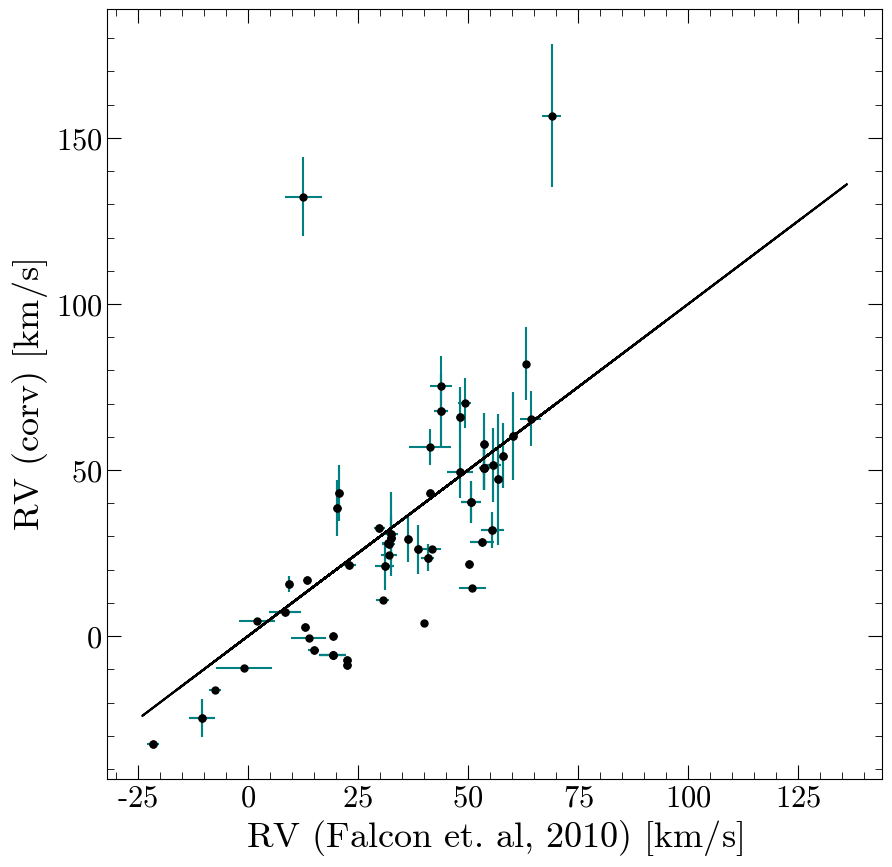

In [6]:
def linear(x):
    return x

plt.figure(figsize=(10,10))
plt.style.use('stefan.mplstyle')

plt.errorbar(falcon_xmatch['Adp-V'][np.abs(falcon_xmatch['corv_rv']) < 2500], falcon_xmatch['corv_rv'][np.abs(falcon_xmatch['corv_rv']) < 2500], 
             xerr = falcon_xmatch['e_Adp-V'][np.abs(falcon_xmatch['corv_rv']) < 2500], yerr = falcon_xmatch['corv_erv'][np.abs(falcon_xmatch['corv_rv']) < 2500],
             fmt='o', label = 'Data', color='black', ecolor = 'teal')
plt.plot(falcon_xmatch['vr'][np.abs(falcon_xmatch['corv_rv']) < 2500], linear(falcon_xmatch['vr'][np.abs(falcon_xmatch['corv_rv']) < 2500]), color = 'black')


ymin, ymax = plt.ylim()
plt.xlabel(r'RV (Falcon et. al, 2010) $[km/s]$')
plt.ylabel(r'RV (corv) $[km/s]$')

#plt.xlim(-25, 75)

<a id="validation-template"></a>

**01. Validating RVs With Templates (Need to check/proofread)**

---

In [7]:
figs = []

for j in tqdm( range(len(falcon_xmatch))):
    p,m,f = np.array(falcon_xmatch['col_p_m_f'][j].split('-')).astype(float)
    
    try:
        xid = SDSS.query_specobj(plate = p, mjd = m, fiberID = f)
    except ValueError:
        print('unknown error')
        
    try:
        sp = SDSS.get_spectra(matches=xid)
    except:
        print('http error')
        continue
    for i in range(len(sp[0:1])):
        wl = np.array(10**sp[i][1].data['loglam'])
        fl = np.array(sp[i][1].data['flux'])
        ivar = np.array(sp[i][1].data['ivar'])
                
        corvmodel = corv.models.make_koester_model(names = ['a','b','g','d'])
        param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)        
        
        
    falcon_xmatch['corv_rv'][j] = (rv_res.params['RV'].value)
    falcon_xmatch['corv_erv'][j] = (rv_res.params['RV'].stderr)

  0%|                                                                                            | 0/97 [00:00<?, ?it/s]/home/arseneau/anaconda3/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
100%|███████████████████████████████████████████████████████████████████████████████████| 97/97 [00:29<00:00,  3.27it/s]


Text(0, 0.5, 'RV (corv) $[km/s]$')

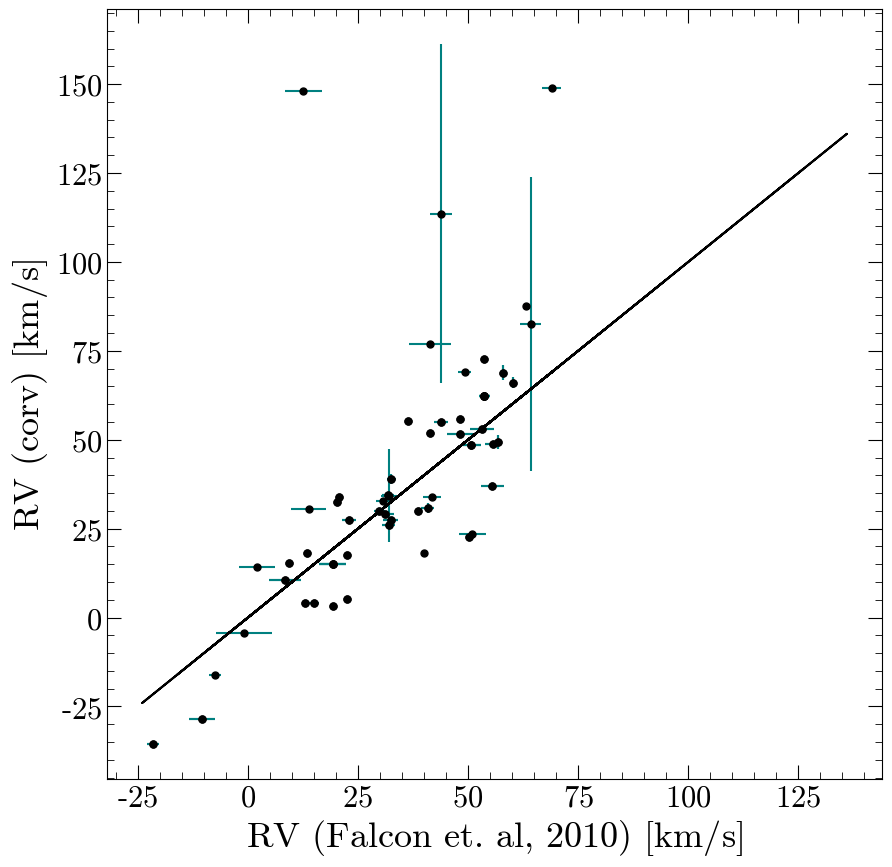

In [8]:
def linear(x):
    return x

plt.figure(figsize=(10,10))
plt.style.use('stefan.mplstyle')

plt.errorbar(falcon_xmatch['Adp-V'][np.abs(falcon_xmatch['corv_rv']) < 2500], falcon_xmatch['corv_rv'][np.abs(falcon_xmatch['corv_rv']) < 2500], 
             xerr = falcon_xmatch['e_Adp-V'][np.abs(falcon_xmatch['corv_rv']) < 2500], yerr = falcon_xmatch['corv_erv'][np.abs(falcon_xmatch['corv_rv']) < 2500],
             fmt='o', label = 'Data', color='black', ecolor = 'teal')
plt.plot(falcon_xmatch['vr'][np.abs(falcon_xmatch['corv_rv']) < 2500], linear(falcon_xmatch['vr'][np.abs(falcon_xmatch['corv_rv']) < 2500]), color = 'black')


ymin, ymax = plt.ylim()
plt.xlabel(r'RV (Falcon et. al, 2010) $[km/s]$')
plt.ylabel(r'RV (corv) $[km/s]$')

#plt.xlim(-25, 75)